## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data =  pd.read_csv("Airbnb.csv")
data.head()

,Date,Adj.Close,Volume,Open,High,Low
0,06/03/22,119.83,4584611.0,118.07,121.50,117.56
1,06/02/22,121.26,5177244.0,117.13,123.00,116.27
2,06/01/22,116.72,6879606.0,121.05,121.07,114.40
3,05/31/22,120.87,9117555.0,120.50,122.30,117.16
4,05/27/22,120.50,7391500.0,116.00,120.70,115.77


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       373 non-null    object 
 1   Adj.Close  373 non-null    float64
 2   Volume     373 non-null    float64
 3   Open       373 non-null    float64
 4   High       373 non-null    float64
 5   Low        373 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.6+ KB


In [4]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.iloc[::-1]      # To flip the data up side down
data.head()

,Date,Adj.Close,Volume,Open,High,Low
372,2020-12-10,144.71,70447540.0,146.00,165.0,141.25
371,2020-12-11,139.25,26980830.0,146.55,151.5,135.10
370,2020-12-14,130.00,16966090.0,135.00,135.3,125.16
369,2020-12-15,124.80,10914430.0,126.69,127.6,121.50
368,2020-12-16,137.99,20409550.0,125.83,142.0,124.91


In [5]:
data["roleclose"] = data["Adj.Close"].rolling(7,7).mean()
data["rolevolume"] = data["Volume"].rolling(7,7).mean()
data["roleopen"] = data["Open"].rolling(7,7).mean()
data["rolelow"] = data["Low"].rolling(7,7).mean()
data["rolehigh"] = data["High"].rolling(7,7).mean()

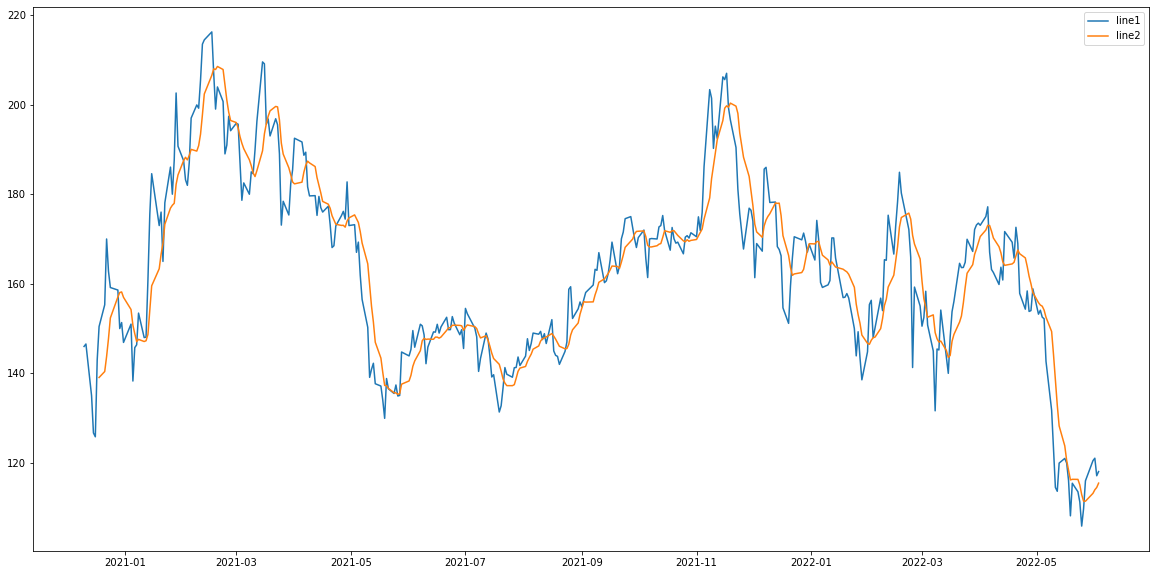

In [6]:
plt.figure(figsize=(20,10))
plt.plot(data["Date"], data["Open"], label = "line1")
plt.plot(data["Date"], data["roleopen"],  label = "line2")
plt.legend()
plt.show()

In [7]:
subset = pd.DataFrame(data.iloc[:,[0,8]]).dropna()
print(subset.shape)
subset.head()

(367, 2)


,Date,roleopen
366,2020-12-18,139.074286
365,2020-12-21,140.404286
364,2020-12-22,143.754286
363,2020-12-23,147.727143
362,2020-12-24,152.365714


## Deviding Data for  train(2021) and test(2022)

In [8]:
mask2021 = (subset['Date'] <= "2022-01-01")
df2021 = subset.loc[mask2021]
df2021.head()

,Date,roleopen
366,2020-12-18,139.074286
365,2020-12-21,140.404286
364,2020-12-22,143.754286
363,2020-12-23,147.727143
362,2020-12-24,152.365714


In [9]:
mask2022 = (subset['Date'] >= "2021-11-15") 
df2022 = subset.loc[mask2022]
df2022.head()

,Date,roleopen
138,2021-11-15,196.434286
137,2021-11-16,199.211429
136,2021-11-17,199.732857
135,2021-11-18,199.432857
134,2021-11-19,200.342857


## Feature scaling 

In [10]:
testdf = np.array(df2021.iloc[:, 1:])
print(testdf.shape)
type(testdf)

(261, 1)


numpy.ndarray

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df = sc.fit_transform(testdf)
df2021['scalar'] = df
print(df.shape)
print(type(df))
df

(261, 1)
<class 'numpy.ndarray'>


C:\Users\ADDANK~1\AppData\Local\Temp/ipykernel_11712/742478729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021['scalar'] = df


array([[0.05139412],
       [0.06955962],
       [0.11531482],
       [0.16957718],
       [0.23293204],
       [0.29687226],
       [0.31053053],
       [0.31226708],
       [0.29585764],
       [0.25876568],
       [0.2109032 ],
       [0.18473786],
       [0.16087491],
       [0.16760649],
       [0.16107003],
       [0.16337242],
       [0.18253302],
       [0.25523404],
       [0.33099842],
       [0.38295838],
       [0.42697703],
       [0.46014712],
       [0.51870207],
       [0.56794989],
       [0.57665216],
       [0.58262278],
       [0.64037775],
       [0.66906012],
       [0.71294219],
       [0.72295175],
       [0.71501044],
       [0.72880529],
       [0.74706835],
       [0.7418587 ],
       [0.75842423],
       [0.79354549],
       [0.85262727],
       [0.91600164],
       [0.9729176 ],
       [0.99252698],
       [0.99073189],
       [1.        ],
       [0.99067335],
       [0.94286941],
       [0.89705567],
       [0.86031492],
       [0.83520322],
       [0.828

In [12]:
df2021.head()

,Date,roleopen,scalar
366,2020-12-18,139.074286,0.051394
365,2020-12-21,140.404286,0.069560
364,2020-12-22,143.754286,0.115315
363,2020-12-23,147.727143,0.169577
362,2020-12-24,152.365714,0.232932


## Making Train set.

In [13]:
df1 = df2021.iloc[:, 2:]
df1 = np.array(df1)
print(df1.shape)
print(type(df1))
df1

(261, 1)
<class 'numpy.ndarray'>


array([[0.05139412],
       [0.06955962],
       [0.11531482],
       [0.16957718],
       [0.23293204],
       [0.29687226],
       [0.31053053],
       [0.31226708],
       [0.29585764],
       [0.25876568],
       [0.2109032 ],
       [0.18473786],
       [0.16087491],
       [0.16760649],
       [0.16107003],
       [0.16337242],
       [0.18253302],
       [0.25523404],
       [0.33099842],
       [0.38295838],
       [0.42697703],
       [0.46014712],
       [0.51870207],
       [0.56794989],
       [0.57665216],
       [0.58262278],
       [0.64037775],
       [0.66906012],
       [0.71294219],
       [0.72295175],
       [0.71501044],
       [0.72880529],
       [0.74706835],
       [0.7418587 ],
       [0.75842423],
       [0.79354549],
       [0.85262727],
       [0.91600164],
       [0.9729176 ],
       [0.99252698],
       [0.99073189],
       [1.        ],
       [0.99067335],
       [0.94286941],
       [0.89705567],
       [0.86031492],
       [0.83520322],
       [0.828

In [14]:
x_tra = []
y_tra = []
for i in range(30, len(df1)):
    
    x_tra.append( df1[i-30:i, 0] )
    
    y_tra.append (df1[i, 0] )

x_tra, y_tra = np.array(x_tra), np.array(y_tra)

X_tra = np.reshape(x_tra, (x_tra.shape[0], x_tra.shape[1], 1))

# Building RNN model

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences = True, input_shape = (X_tra.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.compile(optimizer="adam", loss = "mean_squared_error")

## Model Training

In [17]:
regressor.fit(X_tra, y_tra, epochs=100, batch_size = 32)

Epoch 1/100
8/8 [==============================] - 7s 51ms/step - loss: 0.1357
Epoch 2/100
8/8 [==============================] - 0s 52ms/step - loss: 0.0509
Epoch 3/100
8/8 [==============================] - 0s 52ms/step - loss: 0.0473: 0s - loss: 0.04
Epoch 4/100
8/8 [==============================] - 0s 44ms/step - loss: 0.0477
Epoch 5/100
8/8 [==============================] - 0s 42ms/step - loss: 0.0416
Epoch 6/100
8/8 [==============================] - 0s 42ms/step - loss: 0.0342
Epoch 7/100
8/8 [==============================] - 0s 44ms/step - loss: 0.0298: 0s - loss: 0.030
Epoch 8/100
8/8 [==============================] - 0s 43ms/step - loss: 0.0258
Epoch 9/100
8/8 [==============================] - 0s 44ms/step - loss: 0.0259
Epoch 10/100
8/8 [==============================] - 0s 44ms/step - loss: 0.0235
Epoch 11/100
8/8 [==============================] - 0s 43ms/step - loss: 0.0211
Epoch 12/100
8/8 [==============================] - 0s 43ms/step - loss: 0.0184
Epoch 13/100
8

## Testing Or Predictions

In [18]:
df2022.head()

,Date,roleopen
138,2021-11-15,196.434286
137,2021-11-16,199.211429
136,2021-11-17,199.732857
135,2021-11-18,199.432857
134,2021-11-19,200.342857


In [19]:
df2022['scalar'] = sc.transform(np.array(df2022.iloc[:, 1:]))
df2022.head()

C:\Users\ADDANK~1\AppData\Local\Temp/ipykernel_11712/2058367763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022['scalar'] = sc.transform(np.array(df2022.iloc[:, 1:]))


,Date,roleopen,scalar
138,2021-11-15,196.434286,0.834832
137,2021-11-16,199.211429,0.872763
136,2021-11-17,199.732857,0.879885
135,2021-11-18,199.432857,0.875788
134,2021-11-19,200.342857,0.888217


## Making Test set

In [20]:
df2 = df2022.iloc[:, 2:]
df2 = np.array(df2)
print(df2.shape)
type(df2)
df2

(139, 1)


array([[ 0.83483249],
       [ 0.87276346],
       [ 0.87988527],
       [ 0.87578779],
       [ 0.88821682],
       [ 0.87892919],
       [ 0.85682231],
       [ 0.79717469],
       [ 0.7233615 ],
       [ 0.66459191],
       [ 0.61985132],
       [ 0.57577413],
       [ 0.51903377],
       [ 0.49530741],
       [ 0.47901504],
       [ 0.51384363],
       [ 0.53163841],
       [ 0.54272112],
       [ 0.55079901],
       [ 0.58375446],
       [ 0.58242766],
       [ 0.58313009],
       [ 0.54535521],
       [ 0.48412714],
       [ 0.4237771 ],
       [ 0.38738756],
       [ 0.36286121],
       [ 0.36715381],
       [ 0.37138788],
       [ 0.38128037],
       [ 0.41035297],
       [ 0.44137675],
       [ 0.45948372],
       [ 0.45874227],
       [ 0.46586408],
       [ 0.46600066],
       [ 0.44447913],
       [ 0.42430392],
       [ 0.41006029],
       [ 0.39431426],
       [ 0.40395309],
       [ 0.39630446],
       [ 0.38824608],
       [ 0.38165109],
       [ 0.37739751],
       [ 0

In [21]:
x_test = []
y_test = []
for i in range(30, len(df2)):
    
    x_test.append( df2[i-30:i, 0] )
    
    y_test.append (df2[i, 0] )

x_test, y_test = np.array(x_test), np.array(y_test)

X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
len(X_test)

109

## Making Predictions

In [23]:
predictions = regressor.predict(X_test)
predictions = sc.inverse_transform(predictions)

In [24]:
final_results = df2022
final_results['predictions'] = np.concatenate(([[0]] * 30, predictions), axis = 0)
final_results.head()

C:\Users\ADDANK~1\AppData\Local\Temp/ipykernel_11712/693744238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results['predictions'] = np.concatenate(([[0]] * 30, predictions), axis = 0)


,Date,roleopen,scalar,predictions
138,2021-11-15,196.434286,0.834832,0.0
137,2021-11-16,199.211429,0.872763,0.0
136,2021-11-17,199.732857,0.879885,0.0
135,2021-11-18,199.432857,0.875788,0.0
134,2021-11-19,200.342857,0.888217,0.0


## Ploting graph roleopen and predictions

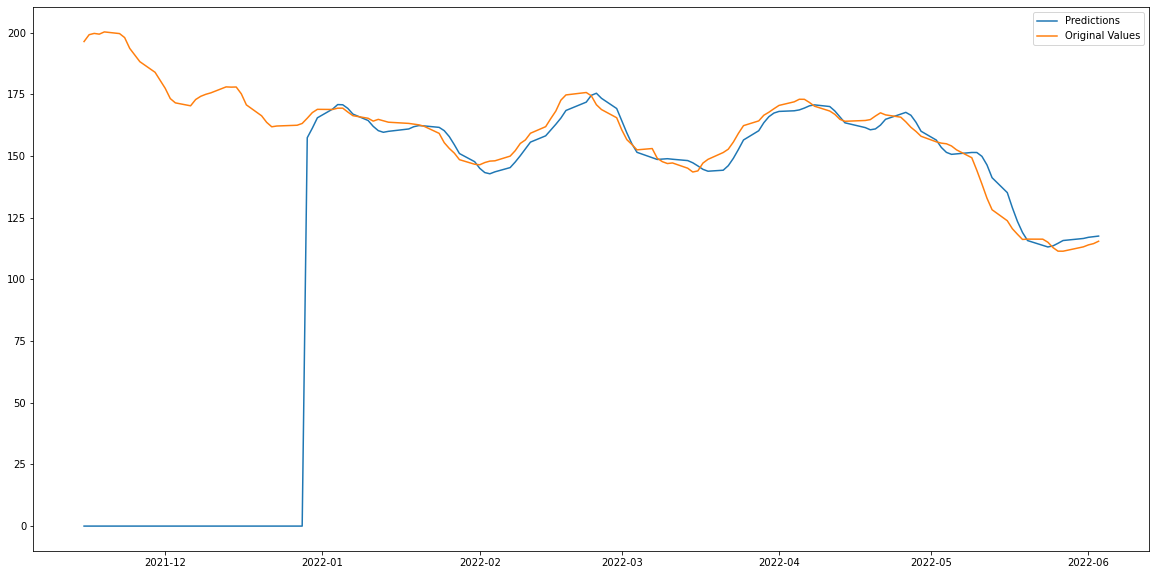

In [26]:
plt.figure(figsize=(20,10))
plt.plot(final_results["Date"], final_results["predictions"], label = "Predictions")
plt.plot(final_results["Date"], final_results["roleopen"],  label = "Original Values")
plt.legend()
plt.show()